### Задача - ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график                         
- Рассчитать коэффициенты корреляции Пирсона и Спирмена                         
- Построить модель линейной регрессии                         
- Рассчитать коэффициент детерминации                         
- Вывести график остатков   

### Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы                     
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности                      

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
data = pd.read_csv('water.csv')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


- Посмотрим на то, как распределены величины

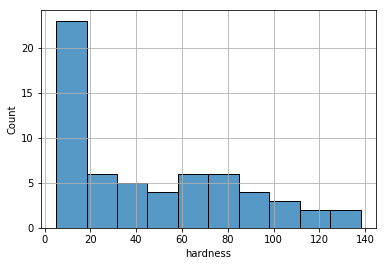

In [72]:
sns.histplot(data['hardness'], bins=10)
plt.grid()

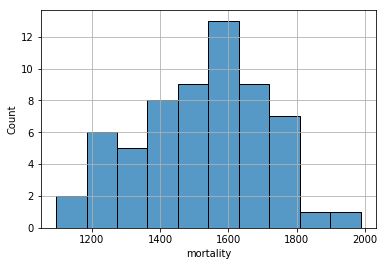

In [73]:
sns.histplot(data['mortality'], bins=10)
plt.grid()

Видно, что жесткость воды не распределена нормально, что будет искажать коэффициент корреляции Пирсона, а вот смертность приближена к нормальному распределению

- Посмотрим взаимосвязь жесткости воды от смертности

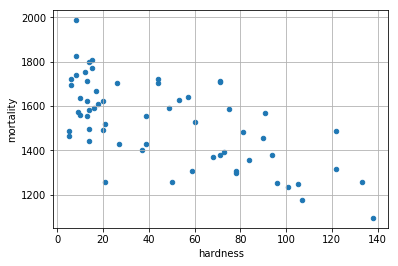

In [74]:
data.plot(kind='scatter', x='hardness', y='mortality')
plt.grid()

На превый взгляд видна небольшая зависимость между жесткостью воды и смертностью в городах. Связь линейная, так как при увеличении одного параметра (жесткость) происходит уменьшение другого параметра (смертность). Но корреляция переменных слабая. При жесткости до 20 единиц некоторые ее значения являются константой (примерно около 15). Проверим это в цифрах: 

In [75]:
# Коэффициент корреляции
pirson = round(data[['hardness', 'mortality']].corr().iloc[0,1], 3) 
spearman = round(data[['hardness', 'mortality']].corr(method='spearman').iloc[0,1], 3) 
kendall = round(data[['hardness', 'mortality']].corr(method='kendall').iloc[0,1], 3) 

# Соответственно объясняющая и объясняемая переменные 
X = data[['hardness']]
y = data['mortality']

# Так как данных мало, то они разбиваются в пропорции 30/70 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Коэффициент детерминации
det = model.score(X_test, y_test)

# Предсказанная смертность на основе тестовой выборки
y_pred = model.predict(X_test)

# Остаток предсказания смертности
e = y_test - y_pred

print(f"Коэффициент корреляции Пирсона: {pirson}")
print(f"Коэффициент корреляции Спирмана: {spearman}")
print(f"Коэффициент корреляции Кенделла: {kendall}")

Коэффициент корреляции Пирсона: -0.655
Коэффициент корреляции Спирмана: -0.632
Коэффициент корреляции Кенделла: -0.454


- Коэффициент корреляци Пирсона на уровне -0.65. Это означает, что зависимость между данными переменнами есть, она средняя (исхожу из того, что корреляция >0.70 является высокой). Также она носит обратный характер - чем выше концентрация кальция, тем ниже смертность. 

- В результате получено, что уравнение регрессии имеет следующий вид:

##### y = 1668.97 - 3.132*x

In [76]:
# Коэффициенты уравнения регрессии

print(model.coef_[0])
print(model.intercept_)

-3.1316708721378266
1668.9722977277095


- Коэффициент детерминации составляет:

In [77]:
round(det, 3)

0.505

- Нашел в интернете такую трактовку коэффициента детерминации:

"коэффициент детерминации указывает, какая ЧАСТЬ изменений одной переменной объясняется изменениями другой переменной"

- А также взаимосвязь коэффициента корреляции и детерминации:

"                                    
Принято считать, что коэффициенты корреляции, которые по модулю больше 0,7, говорят о сильной связи (при этом коэффициенты детерминации > 50%, т.е. один признак определяет другой более, чем наполовину).

Коэффициенты корреляции, которые по модулю меньше 0,7, но больше 0,5, говорят о связи средней силы (при этом коэффициенты детерминации меньше 50%, но больше 25%).

Наконец, коэффициенты корреляции, которые по модулю меньше 0,5, говорят о слабой связи (при этом коэффициенты детерминации меньше 25%).                           
"
- Коэффициент детерминации на уровне 0.5, что является показателем сильной связи. Ну или выше средней, так как коэффициент корреляции, все же, не дотягивает до >70%. Следовательно, половина из всего тестового набора данных X_test объясняет y_test. Предположу, что и коэффициенты корреляции, и детерминации могли бы быть несколько выше на бОльшей выборке данных. Но смертность зависит не только от содержания кальция в воде, поэтому, наверное, коэффициент детерминации не сильно бы превысит 0.5.

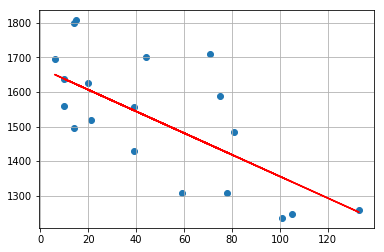

In [78]:
# Тестовый набор данных и результат работы модели
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.grid()

Text(0, 0.5, 'Остаток предсказания')

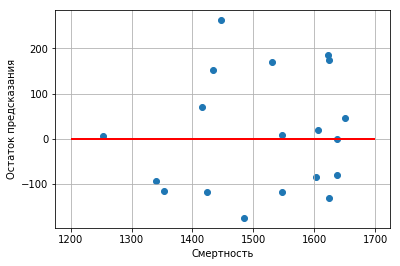

In [82]:
# График остатков
plt.scatter(y_pred, e)
plt.hlines(y=0, xmin=1200, xmax=1700, lw=2, color='red')
plt.grid()
plt.xlabel('Смертность')
plt.ylabel('Остаток предсказания')

## Возник вопрос по красной линии

Она должна быть горизонтальной или же соответствовать (X_test, y_pred)? Исхожу из мысли, что по Х у нас действительное значение предсказанной величины, а по У - лишь отклонение данной величины. Если бы прямая была под углом, то, скажем, одинаковые остатки для двух разных значений по Х имели бы разные координаты по оси У. Это, как минимум, затрудняет чтение значений точек относительно самой линии. Также в интернете по данному вопросу нашел пару статей, где линия была горизонтальной. 

Но, например, на стриме данного урока около 1:09:30 был пример графика остатков. Там линия, относительно которой откладываются остатки, возрастает, что приводит к вышеописанной ситуации.

Как правильно подойти к построению данного графика? 

### Теперь проведем разделение на северные и южные города, а после дадим общий вывод 

In [83]:
north = data.loc[data.location == 'North', :]
south = data.loc[data.location == 'South', :]
print(f'Число северных городов {len(north)}')
print(f'Число южных городов {len(south)}')

Число северных городов 35
Число южных городов 26


- Сразу видно, что данных очень мало. Проделываем все то же самое

### 1. Северные города

In [84]:
# Коэффициент корреляции
pirson = round(north[['hardness', 'mortality']].corr().iloc[0,1], 3) 
spearman = round(north[['hardness', 'mortality']].corr(method='spearman').iloc[0,1], 3) 
kendall = round(north[['hardness', 'mortality']].corr(method='kendall').iloc[0,1], 3) 

# Соответственно объясняющая и объясняемая переменные 
X = north[['hardness']]
y = north['mortality']

# Так как данных мало, то они разбиваются в пропорции 30/70 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Коэффициент детерминации
det = model.score(X_test, y_test)

# Предсказанная смертность на основе тестовой выборки
y_pred = model.predict(X_test)

# Остаток предсказания смертности
e = y_test - y_pred

print(f"Коэффициент корреляции Пирсона: {pirson}")
print(f"Коэффициент корреляции Спирмана: {spearman}")
print(f"Коэффициент корреляции Кенделла: {kendall}")
print(f'Коэффициент детерминации: {round(det, 3)}')

Коэффициент корреляции Пирсона: -0.369
Коэффициент корреляции Спирмана: -0.404
Коэффициент корреляции Кенделла: -0.283
Коэффициент детерминации: 0.019


- Анализируя коэффициенты корреляции и детерминации, можно сказать, что взаимосвязь между двумя параметрами слабая. Наша модель почти никак себя не проявляет. Думаю, такие плачевные результаты можно отнести на величину выборки (35 городов). Если же это не так, то южные города должны показать очень высокую взаимосвязь переменных, так как все города вместе показали среднюю взаимосвязь.

In [85]:
print(model.coef_[0])
print(model.intercept_)

-1.9768622600638235
1688.150229031281


#### Уравнение имеет вид y = 1688.15 - 1.97 * x

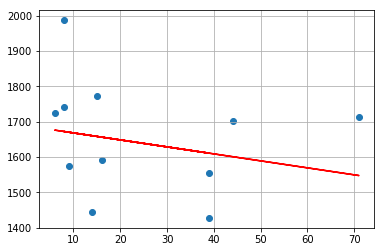

In [86]:
# Тестовый набор данных и результат работы модели
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.grid()

Text(0, 0.5, 'Остаток предсказания')

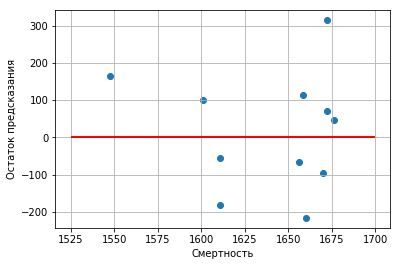

In [90]:
# График остатков
plt.scatter(y_pred, e)
plt.hlines(y=0, xmin=1525, xmax=1700, lw=2, color='red')
plt.grid()
plt.xlabel('Смертность')
plt.ylabel('Остаток предсказания')

### 2. Южные города

Разделение данных 30/70

In [111]:
# Коэффициент корреляции
pirson = round(south[['hardness', 'mortality']].corr().iloc[0,1], 3) 
spearman = round(south[['hardness', 'mortality']].corr(method='spearman').iloc[0,1], 3) 
kendall = round(south[['hardness', 'mortality']].corr(method='kendall').iloc[0,1], 3) 

# Соответственно объясняющая и объясняемая переменные 
X = south[['hardness']]
y = south['mortality']

# Так как данных мало, то они разбиваются в пропорции 30/70 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Коэффициент детерминации
det = model.score(X_test, y_test)

# Предсказанная смертность на основе тестовой выборки
y_pred = model.predict(X_test)

# Остаток предсказания смертности
e = y_test - y_pred

print(f"Коэффициент корреляции Пирсона: {pirson}")
print(f"Коэффициент корреляции Спирмана: {spearman}")
print(f"Коэффициент корреляции Кенделла: {kendall}")
print(f'Коэффициент детерминации: {round(det, 3)}')

Коэффициент корреляции Пирсона: -0.602
Коэффициент корреляции Спирмана: -0.596
Коэффициент корреляции Кенделла: -0.44
Коэффициент детерминации: -2.552


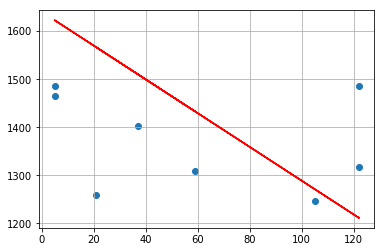

In [114]:
# Тестовый набор данных и результат работы модели
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.grid()

Text(0, 0.5, 'Остаток предсказания')

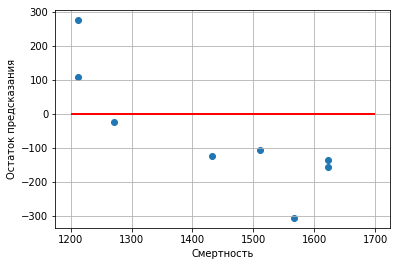

In [115]:
# График остатков
plt.scatter(y_pred, e)
plt.hlines(y=0, xmin=1200, xmax=1700, lw=2, color='red')
plt.grid()
plt.xlabel('Смертность')
plt.ylabel('Остаток предсказания')

- Анализируя полученные результаты, можно сделать вывод, что наша модель, основанная лишь на южных городах, абсолютно бесполезна. Наивная модель, более чем в 3.5 раза дает лучшие результаты, чем регрессия. Коеффициенты корреляции несклько ниже, чем при анализе всех городов вместе. Это достигнуто при разделении данных на тренировочный и тестовый сет в пропорции 30/70.

### 3. Южные города

Разделение данных 60/40

In [127]:
# Коэффициент корреляции
pirson = round(south[['hardness', 'mortality']].corr().iloc[0,1], 3) 
spearman = round(south[['hardness', 'mortality']].corr(method='spearman').iloc[0,1], 3) 
kendall = round(south[['hardness', 'mortality']].corr(method='kendall').iloc[0,1], 3) 

# Соответственно объясняющая и объясняемая переменные 
X = south[['hardness']]
y = south['mortality']

# Так как данных мало, то они разбиваются в пропорции 30/70 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Коэффициент детерминации
det = model.score(X_test, y_test)

# Предсказанная смертность на основе тестовой выборки
y_pred = model.predict(X_test)

# Остаток предсказания смертности
e = y_test - y_pred

print(f"Коэффициент корреляции Пирсона: {pirson}")
print(f"Коэффициент корреляции Спирмана: {spearman}")
print(f"Коэффициент корреляции Кенделла: {kendall}")
print(f'Коэффициент детерминации: {round(det, 3)}')

Коэффициент корреляции Пирсона: -0.602
Коэффициент корреляции Спирмана: -0.596
Коэффициент корреляции Кенделла: -0.44
Коэффициент детерминации: 0.203


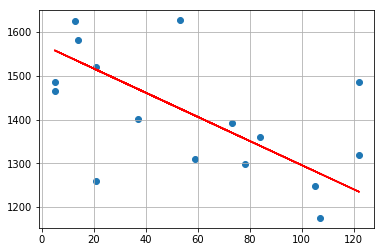

In [122]:
# Тестовый набор данных и результат работы модели
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.grid()

Text(0, 0.5, 'Остаток предсказания')

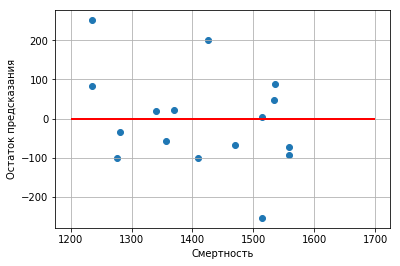

In [123]:
# График остатков
plt.scatter(y_pred, e)
plt.hlines(y=0, xmin=1200, xmax=1700, lw=2, color='red')
plt.grid()
plt.xlabel('Смертность')
plt.ylabel('Остаток предсказания')

- При разделении данных в пропорции 60/40 удалось получить положительный коэффициент детерминации. Но, предположу, это лишь случйность, так как пропорции 55/45 и 65/35 уже были в отрицательных значениях.

### Вывод

В распоряжении было всего 61 наблюдение. Исследования показали, что лишь первое из них можно назвать пригодным для формулировки каких-либо выводов. Разделение отдельно на географическое положение привело к тому, что данных в наборе оказалось очень мало. Это не дало модели достаточно информации для обучения. Если в северных городах еще поулчилось получить положительный коэффициент детерминации при рекомендованном разделении данных 30/70, то во на южных городах этого не удалось. Лишь пропорция 60/40 выдала что-то разумное, но вряд ли это можно считать достоверным результатом.

Анализируя первое исследование, можно сделать вывод, что количество содержания кальция в питьевой воде уменьшает число смертей в городах. Чтобы подтвердить правдивость данной гипотезы, в интернете найдены исследования данного вопроса, кстати, опирающиеся на этот датасет. Вот выдержка из него: 

"
В среднем, с каждым увеличением содержания кальция на 25 мг/л смертность снижается примерно на 50 на 100000 жителей. Одна из причин более тесной связи частоты смертей с содержанием кальция, чем с общей жесткостью воды, объясняется тем, что в очень жесткой воде ряда городов содержится относительно большее количество магния, чем кальция.
"

Поэтому предположение можно считать верным. Но также надо учесть, что смертность зависит от многих факторов, которые здесь не рассматриваются: убийства, несчастные случаи, прочие заболевания... Поэтому коэффициент корреляции на уровни 0.65, а не приближен к 1.